In [106]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [107]:
def read_bmp(filepath):
    """
    Wczytuje obraz BMP i zwraca jako macierz RGB typu uint8.
    """
    image = Image.open(filepath)
    return np.array(image, dtype=np.uint8)

def show_image(image, title=''):
    """
    Wyświetla obraz RGB typu np.array
    """
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

def save_array_to_bmp(array, filepath):
    """
    Zapisuje macierz RGB jako plik BMP
    """
    Image.fromarray(array).save(filepath)

In [108]:
def to_grayscale(img):
    return np.mean(img, axis=2).astype(np.uint8)

def binarize(img, x_factor=1.2):
     """
     Binaryzuje obraz na podstawie progu wyznaczonego jako:
     P = suma(jasności) / liczba pikseli
     Próg końcowy = P / x_factor  
     """
     h, w = img.shape
     P = np.sum(img) / (h * w)
     threshold = P / x_factor
     binary = (img > threshold).astype(np.uint8) * 255
     return binary.astype(np.uint8)   
    

In [121]:
def delete_unimportant_objects_from_image(binary_img):
    """
    Zostawia tylko największy obiekt (źrenicę) na obrazie binarnym.
    Zakłada, że obraz ma wartości 0 i 255.
    """
    
    inverted_img = cv2.bitwise_not(binary_img)
    
    contours, _ = cv2.findContours(inverted_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    if not contours:
        print("Brak konturów.")
        return binary_img

    largest_contour = max(contours, key=cv2.contourArea)

    # Nowa largest_object_imga tylko dla największego obiektu
    largest_object_img = np.zeros_like(inverted_img)
    cv2.drawContours(largest_object_img, [largest_contour], -1, color=255, thickness=-1)
    
    largest_object_img = cv2.bitwise_not(largest_object_img)

    return largest_object_img

def extract_pupil(binary_image):
    """
    Oczyszcza binarny obraz źrenicy z szumów i zakłóceń, zostawia tylko źrenicę.
    """
    kernel_large = np.ones((5, 5), np.uint8)
    kernel_small = np.ones((3, 3), np.uint8)

    extracted_image = binary_image.copy()

    extracted_image = delete_unimportant_objects_from_image(extracted_image)

    extracted_image = cv2.morphologyEx(extracted_image, cv2.MORPH_CLOSE, kernel_large)
    extracted_image = cv2.erode(extracted_image, kernel_small, iterations=2)
    
    extracted_image = cv2.dilate(extracted_image, kernel_small, iterations=2)
    extracted_image = cv2.medianBlur(extracted_image, 5)

    extracted_image = cv2.GaussianBlur(extracted_image, (9, 9), 0)
    extracted_image = cv2.morphologyEx(extracted_image, cv2.MORPH_OPEN, kernel_large)
    
    return extracted_image

def extract_iris(binary_image):
    """
    Oczyszcza binarny obraz tęczówki z szumów i zakłóceń, zostawia tylko tęczówkę (oczywiście ze źrenicą).
    """
    #TO DO
    
    extracted_image = binary_image.copy()
    
    return extracted_image

def do_projections(img):
    """
    Oblicza projekcje poziomą i pionową obrazu.
    """
    #TO DO
    horizontal_projection = np.sum(img, axis=1)
    vertical_projection = np.sum(img, axis=0)
    
    return horizontal_projection, vertical_projection


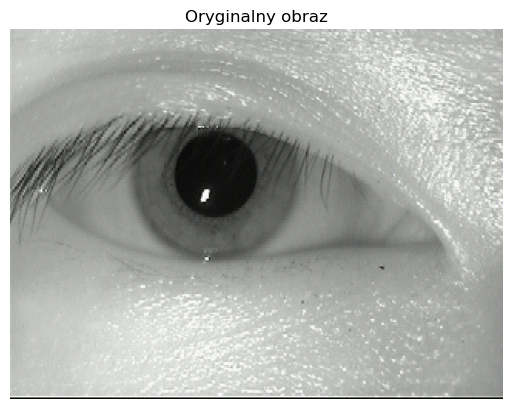

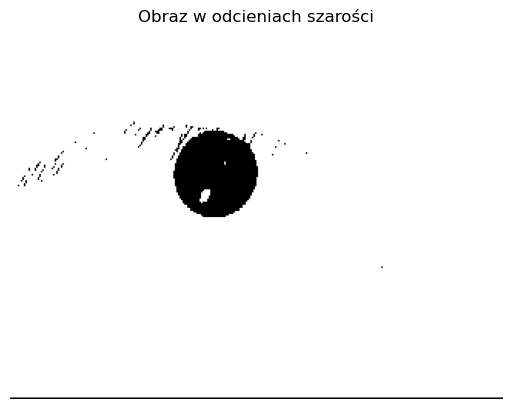

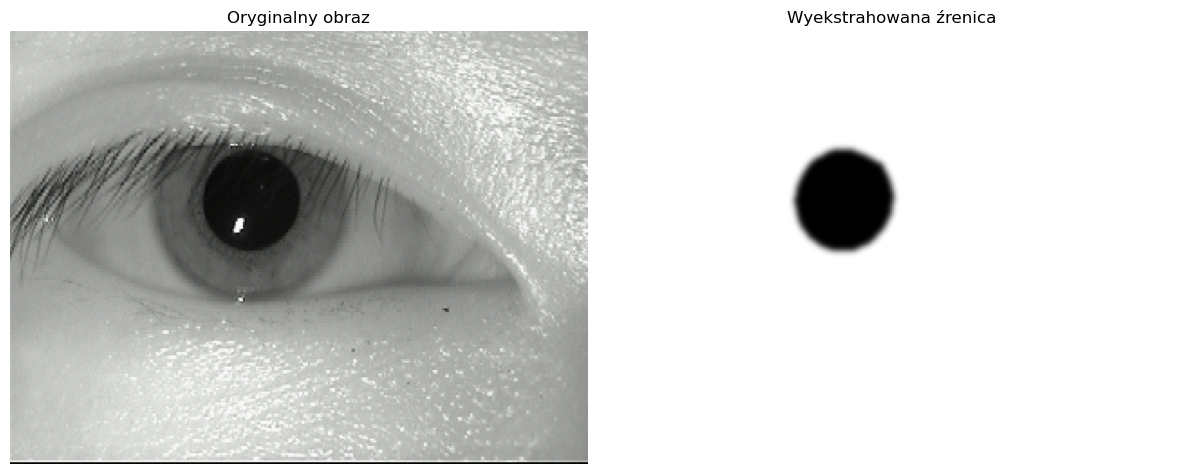

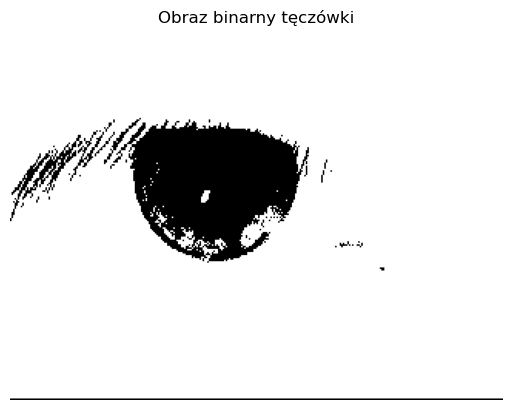

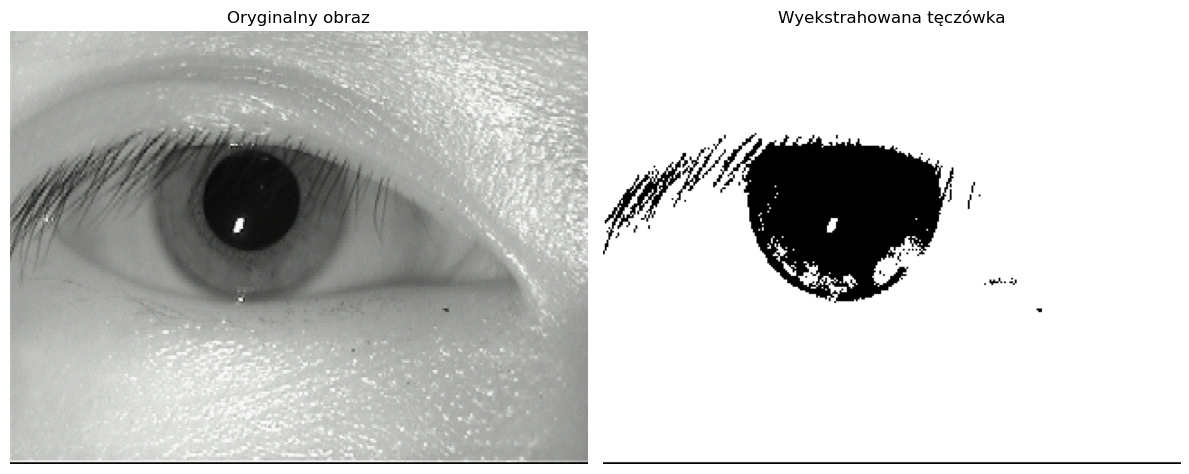

In [120]:
number = '28'#'1'
direction = 'right'#'left'
name = 'ongblr2'#'aeval1'

##### Wczytanie i wyświetlenie oryginalnego obrazu #####
original_img = read_bmp(f'./data/MMU-Iris-Database/{number}/{direction}/{name}.bmp')
show_image(original_img, 'Oryginalny obraz')


##### Przetwarzanie obrazu - konwersja do skali szarości i binaryzacja #####
img = to_grayscale(original_img)
img_binarized_pupil = binarize(img, x_factor=3.5)
show_image(img_binarized_pupil, 'Obraz w odcieniach szarości')

##### Usunięcie nieistotnych obiektów z obrazu binarnego i wyekstrahowanie źrenicy #####
img_pupil_extracted = extract_pupil(img_binarized_pupil)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(original_img)
axes[0].set_title('Oryginalny obraz')
axes[0].axis('off')

axes[1].imshow(img_pupil_extracted, cmap='gray')
axes[1].set_title('Wyekstrahowana źrenica')
axes[1].axis('off')

plt.tight_layout()
plt.show()

##### Wekstrahowanie tęczówki i źrenicy z obrazów #####

img_binarized_iris = binarize(img, x_factor=1.7)
show_image(img_binarized_iris, 'Obraz binarny tęczówki')

##### Usunięcie nieistotnych obiektów z obrazu binarnego i wyekstrahowanie tęczówki #####

#### TO DO
img_iris_extracted = extract_iris(img_binarized_iris) ####### TUTAJ NIC SIE NIE DZIEJE JESZCZE

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(original_img)
axes[0].set_title('Oryginalny obraz')
axes[0].axis('off')

axes[1].imshow(img_iris_extracted, cmap='gray')
axes[1].set_title('Wyekstrahowana tęczówka')
axes[1].axis('off')

plt.tight_layout()
plt.show()


##### Projekcja pionowa i pozioma w celu znalezienia promienia źrenicy #####

### TO DO




